<a href="https://colab.research.google.com/github/Asma6767/AI/blob/main/rugby_and_soccer_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
train_dir = '/content/drive/MyDrive/NEW/train'
test_dir = '/content/drive/MyDrive/NEW/test'

In [ ]:
import os
print(len(os.listdir('/content/drive/MyDrive/NEW/train/rugby')))
print(len(os.listdir('/content/drive/MyDrive/NEW/train/soccer')))
print(len(os.listdir('/content/drive/MyDrive/NEW/test/rugby')))
print(len(os.listdir('/content/drive/MyDrive/NEW/test/soccer')))

465
465
90
87


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 744 images belonging to 2 classes.
Found 186 images belonging to 2 classes.


In [ ]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [ ]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_data, epochs=20, validation_data=validation_data)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 320s 13s/step - accuracy: 0.5146 - loss: 0.7830 - val_accuracy: 0.5000 - val_loss: 0.7036
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - accuracy: 0.5171 - loss: 0.6936 - val_accuracy: 0.5806 - val_loss: 0.6892
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 76s 3s/step - accuracy: 0.6432 - loss: 0.6401 - val_accuracy: 0.5914 - val_loss: 0.6656
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 76s 3s/step - accuracy: 0.7240 - loss: 0.5744 - val_accuracy: 0.7258 - val_loss: 0.6159
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 79s 3s/step - accuracy: 0.7778 - loss: 0.4759 - val_accuracy: 0.6505 - val_loss: 0.7868
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 79s 3s/step - accuracy: 0.8754 - loss: 0.3092 - val_accuracy: 0.6452 - val_loss: 1.0361
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 80s 3s/step - accuracy: 0.9598 - loss: 0.1641 - val_accuracy: 0.6129 - val_loss: 1.4712
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - accuracy: 0.9878 - loss: 0.0673 - val_accuracy: 0.5645 - val_los

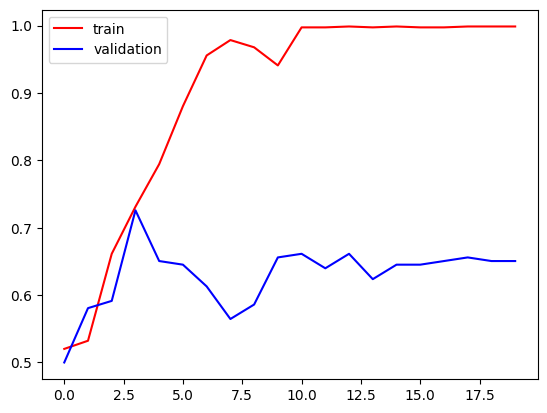

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

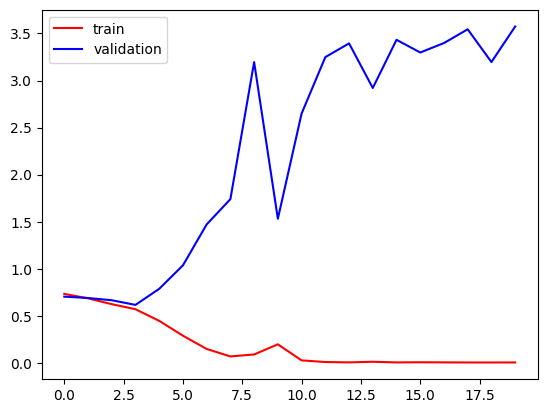

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 177 images belonging to 2 classes.


In [ ]:
predictions = model.predict(test_data)

6/6 ━━━━━━━━━━━━━━━━━━━━ 69s 14s/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)

cm = confusion_matrix(true_labels, predicted_labels)

print("Confusion Matrix:")
print(cm)


print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[42 48]
 [34 53]]
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.47      0.51        90
           1       0.52      0.61      0.56        87

    accuracy                           0.54       177
   macro avg       0.54      0.54      0.53       177
weighted avg       0.54      0.54      0.53       177



In [ ]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 129s 5s/step - accuracy: 0.5280 - loss: 7.2418 - val_accuracy: 0.4409 - val_loss: 1.5613
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 116s 5s/step - accuracy: 0.6474 - loss: 3.3599 - val_accuracy: 0.6075 - val_loss: 2.6788
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 113s 5s/step - accuracy: 0.6931 - loss: 2.3918 - val_accuracy: 0.5161 - val_loss: 3.9655
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 110s 5s/step - accuracy: 0.7465 - loss: 1.3538 - val_accuracy: 0.5108 - val_loss: 3.8966
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 110s 5s/step - accuracy: 0.7985 - loss: 1.0212 - val_accuracy: 0.4247 - val_loss: 5.4452
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 111s 5s/step - accuracy: 0.8428 - loss: 0.6406 - val_accuracy: 0.5269 - val_loss: 3.1628
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 122s 5s/step - accuracy: 0.8645 - loss: 0.5634 - val_accuracy: 0.3710 - val_loss: 3.0353
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 118s 5s/step - accuracy: 0.8892 - loss: 0.4563 - val_accuracy: 0.5000 - v

In [ ]:
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 177 images belonging to 2 classes.


In [ ]:
predictions = model.predict(test_data)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[42 48]
 [38 49]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.53      0.47      0.49        90
           1       0.51      0.56      0.53        87

    accuracy                           0.51       177
   macro avg       0.52      0.51      0.51       177
weighted avg       0.52      0.51      0.51       177



In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()
pretrained_model = tf.keras.applications.ResNet50(include_top = False,
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = resnet_model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 163s 6s/step - accuracy: 0.5645 - loss: 3.1590 - val_accuracy: 0.6183 - val_loss: 1.1435
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 154s 6s/step - accuracy: 0.6513 - loss: 0.8788 - val_accuracy: 0.5914 - val_loss: 0.6654
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 148s 6s/step - accuracy: 0.6710 - loss: 0.5954 - val_accuracy: 0.6505 - val_loss: 0.6534
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 147s 6s/step - accuracy: 0.6283 - loss: 0.6673 - val_accuracy: 0.6183 - val_loss: 0.6716
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 148s 6s/step - accuracy: 0.6732 - loss: 0.6985 - val_accuracy: 0.6022 - val_loss: 0.7425
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 149s 6s/step - accuracy: 0.6712 - loss: 0.6382 - val_accuracy: 0.6613 - val_loss: 0.6898
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 148s 6s/step - accuracy: 0.7232 - loss: 0.5544 - val_accuracy: 0.5161 - val_loss: 1.0486
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 146s 6s/step - accuracy: 0.7153 - loss: 0.5686 - val_accuracy: 0.5645 - v

In [ ]:
predictions = resnet_model.predict(test_data)

6/6 ━━━━━━━━━━━━━━━━━━━━ 32s 5s/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)

cm = confusion_matrix(true_labels, predicted_labels)

print("Confusion Matrix:")
print(cm)

print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[43 47]
 [43 44]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.50      0.48      0.49        90
           1       0.48      0.51      0.49        87

    accuracy                           0.49       177
   macro avg       0.49      0.49      0.49       177
weighted avg       0.49      0.49      0.49       177

